# Stroke Risk Prediction and Data Visualization with Machine Learning 

### Writer: Burak Kahveci - Bioengineer & Data Scientist 

## Introduction 
* A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.

**Signs and symptoms of stroke include:**
* **Trouble speaking and understanding what others are saying.** You may experience confusion, slur your words or have difficulty understanding speech.
* **Problems seeing in one or both eyes.** You may suddenly have blurred or blackened vision in one or both eyes, or you may see double.
* **Trouble walking.** You may stumble or lose your balance. You may also have sudden dizziness or a loss of coordination.

![](2021-12-11-10-46-24.png)


### Reference: Mayo Clinic
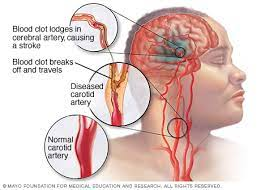

## Content

1. [Load and Review Dataset](#1)
    * [Reading Dataset & Pre-examination](#2)
    * [Basic Visualization](#3)
2. [Data Preprocessing & Variables types adjustment](#4)
3. [Train & Test Split](#5)
4. [Machine Learning Models](#6)
    * [General Informations](#7)
    * [Logistic Regression (LR)](#8)
    * [Naive Bayesian (NB)](#9)
    * [K-nearest neighbors (KNN)](#10)
    * [Support Vector Machine (SVM)](#11)
    * [Non-Linear SVM (Radial Basis Function)](#12)
    * [Artificial Neural Networks (ANN)](#13)
    * [Classification And Regression Tree (CART)](#14)
    * [Random Forest (RF)](#15)
    * [Gradient Boosting Machines (GBM)](#16)
5. [Evaluation of Results](#17)
6. [Creation of Prediction Funtion](#18)
7. [Artificial Patients Profiles for Prection Function](#19)
8. [Stroke Risk Prediction of Patients](#20)

<a id ="1"></a><br>
## Load and Review Dataset

In [1]:
#General Libraries
import numpy as np
import pandas as pd 

# Statistic & Machine Learning Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Data Visualiztion Libraries
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings('ignore')

<a id ="2"></a><br>
### Reading Dataset & Pre-examination

In [2]:
dataset = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = dataset.copy()

df = df.dropna() # Missing observation is removed.
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.count() # Removed 201 missing observations.

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


<a id ="3"></a><br>
### Basic Visualization

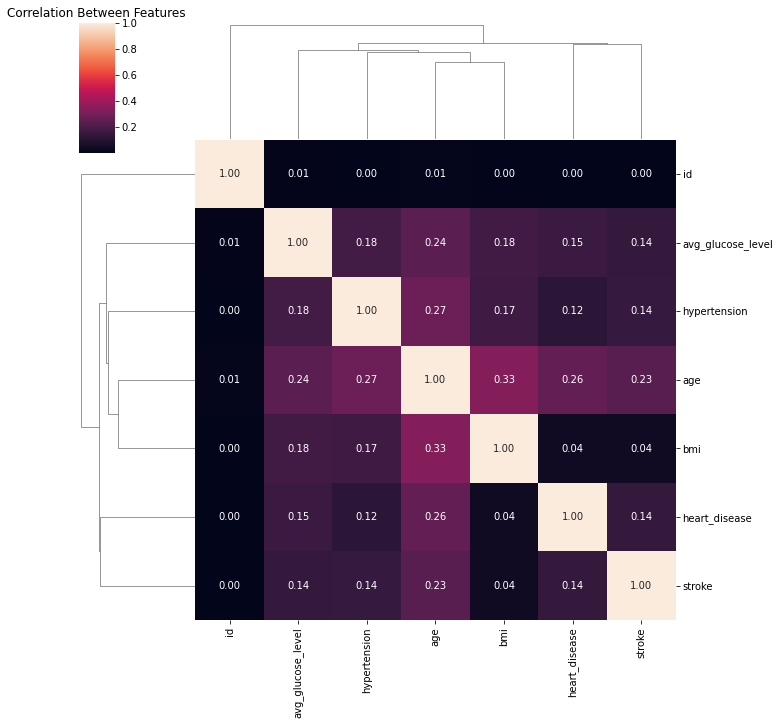

In [8]:
corr_data = df.corr() # It checks the correlation between the numerical values in the data.
sns.clustermap(corr_data,annot= True,fmt = '.2f')
# While annot shows the numerical values on the chart, fmt determines how many digits will be displayed after the comma.

plt.title('Correlation Between Features')
plt.show();

In [9]:
# Dependent variable

df["stroke"].value_counts() 

#1 = Stroke, 0= No stroke

0    4700
1     209
Name: stroke, dtype: int64

<a id ="4"></a><br>
## Data Preprocessing & Variables types adjustment

In [10]:
y = df["stroke"] #Dependent variable
X = df.drop(["stroke"], axis=1) #Independent variable

In [11]:
X['smoking_status'] = X['smoking_status'].replace({'formerly smoked' or 'smokes':'smoked','never smoked' or 'Unknown':'non_smoking'})
#4 Status downgraded to Status 2.
X['smoking_status'] = [1 if i.strip() == 'smoked' else 0 for i in X.smoking_status]
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)
X = X.drop(["id"], axis=1)

X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,228.69,36.6,1
2,1,80.0,0,1,1,0,105.92,32.5,0
3,0,49.0,0,0,1,1,171.23,34.4,0
4,0,79.0,1,0,1,0,174.12,24.0,0
5,1,81.0,0,0,1,1,186.21,29.0,1


<a id ="5"></a><br>
## Train & Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

<a id ="6"></a><br>
## Machine Learning Models

<a id ="7"></a><br>
### General Informations

In this tutorial, we will use 9 techniques which are logistic regression, navie bayesian, k-nearest neigbors, support vector machine, Non-Linear SVM (Radial Basis Function), artificial neural networks, Classification And Regression Tree (CART), Random Forest (RF), and Gradient Boosting Machines (GBM)

<a id ="8"></a><br>
### Logistic Regression (LR)

In [13]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

testscore_lr =accuracy_score(y_test, loj_model.predict(X_test))
accuracy_score(y_test, loj_model.predict(X_test)) 

0.9460285132382892

In [14]:
crosscore_lr =cross_val_score(loj_model, X_test, y_test, cv = 10).mean() 
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9440012368583799

<a id ="9"></a><br>
### Naive Bayesian (NB)

In [15]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

y_pred = nb_model.predict(X_test)
testscore_nb =   accuracy_score(y_test, y_pred) 
accuracy_score(y_test, y_pred) 

0.8737270875763747

In [16]:
crosscore_nb=cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 

0.8706246134817563

<a id ="10"></a><br>
### K-nearest neighbors (KNN)

In [17]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

y_pred = knn_model.predict(X_test)

testscore_knn =accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9389002036659878

In [18]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
print("The best parameters: " + str(knn_cv.best_params_)) 

The best parameters: {'n_neighbors': 14}


In [20]:
knn = KNeighborsClassifier(14)
knn_tuned = knn.fit(X_train, y_train)
knn_tuned.score(X_test, y_test)

0.9460285132382892

In [21]:
y_pred = knn_tuned.predict(X_test)
crosscore_knn=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred) 

0.9460285132382892

<a id ="11"></a><br>
### Support Vector Machine (SVM)

In [22]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

testscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred) #test acc

0.9460285132382892

In [23]:
svc_params = {"C": np.arange(1,2)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished


The best parameters: {'C': 1}


In [24]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9460285132382892

<a id ="12"></a><br>
### Non-Linear SVM (Radial Basis Function)

In [25]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
testscore_nonsvm=accuracy_score(y_test, y_pred) 
accuracy_score(y_test, y_pred) 

0.9460285132382892

In [26]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.0min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [27]:
print("The Best Parameters: " + str(svc_cv_model.best_params_))

The Best Parameters: {'C': 0.0001, 'gamma': 0.0001}


In [28]:
svc_tuned = SVC(C = 0.0001, gamma = 0.0001).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)

crosscore_nonsvm=accuracy_score(y_test, y_pred) #Tuning acc
accuracy_score(y_test, y_pred) #Tuning acc

0.9460285132382892

<a id ="13"></a><br>
### Artificial Neural Networks (ANN)

In [29]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

y_pred = mlpc.predict(X_test_scaled)

testscore_mlpc=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9439918533604889

In [31]:

### Tuning YSA

mlpc_params = {"alpha": [0.01, 0.02, 0.005],
              "hidden_layer_sizes": [(100,100,100),
                                     (100,100),
                                     (5, 3)],
              "solver" : ["lbfgs","adam"],
              "activation": ["relu","logistic"]}

mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.0min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(100, 100, 100), (100, 100),
                                                (5, 3)],
                         'solver': ['lbfgs', 'adam']},
             verbose=2)

In [32]:
print("The Best Parameters: " + str(mlpc_cv_model.best_params_))

The Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (5, 3), 'solver': 'adam'}


In [33]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (5, 3),
                          solver = "sgd")

In [34]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred = mlpc_tuned.predict(X_test_scaled)
crosscore_mlpc=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9460285132382892

<a id ="14"></a><br>
### Classification And Regression Tree (CART)

In [35]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [36]:
y_pred = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9083503054989817

In [37]:

#Model Tunning

cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

print("The Best Parameters " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:    8.0s


The Best Parameters {'max_depth': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.3s finished


In [38]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

y_pred = cart_tuned.predict(X_test)
crosscore_cart=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9439918533604889

<a id ="15"></a><br>
### Random Forest (RF)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
testscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.945010183299389

In [40]:

#Model Tuniing

rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5],
            "n_estimators": [10,500],
            "min_samples_split": [2,5]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)
print("The Best Parameters: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   54.9s


The Best Parameters: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


In [41]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 5)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=5)

In [42]:
y_pred = rf_tuned.predict(X_test)
crosscore_rf=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9460285132382892

<a id ="16"></a><br>
### Gradient Boosting Machines (GBM)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
testscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9439918533604889

In [44]:
### Model Tuning

gbm_params = {"learning_rate" : [0.001, 0.01],
             "n_estimators": [100,500],
             "max_depth": [3,10],
             "min_samples_split": [2,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

print("The Best Parameters: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.2min finished


The Best Parameters: {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
gbm = GradientBoostingClassifier(learning_rate = 0.001, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(X_train,y_train)
y_pred = gbm_tuned.predict(X_test)
crosscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9460285132382892

<a id ="17"></a><br>
## Evaluation of Results

In [46]:

modeller_name=['LR','NB','KNN', 'SVC', 'Non-SVC','ANN','CART', 'RF','GradientBoosting']
model_Test=[testscore_lr,testscore_nb,testscore_knn,testscore_svm,testscore_nonsvm,testscore_mlpc,testscore_cart,testscore_rf,testscore_gbm]
model_Croos=[crosscore_lr,crosscore_nb,crosscore_knn,crosscore_svm,crosscore_nonsvm,crosscore_mlpc,crosscore_cart,crosscore_rf,crosscore_gbm]
#creating line1

line1= go.Scatter(
    x = modeller_name, # x axis
    y = model_Test, # y axis
    mode = "markers", #type of plot
    name = "Test Scores", # name of the plots
    marker = dict(color = 'rgba(167,150,55,0.8)'), #color + opacity
    text = modeller_name # hover text
)

#cretaing line2
line2= go.Scatter(
    x = modeller_name,
    y = model_Croos,
    mode = 'lines+markers',
    name = "Cross Valid Scores",
    marker = dict(color = 'rgba(95,26,80,0.8)'),
    text = modeller_name
) 

data = [line1,line2]

layout= dict(title= 'Comparison of Test & Cross Validation Scores',              
             xaxis= dict(title= 'ML Methods',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)

<a id ="18"></a><br>
## Creation of Prediction Funtion

In [47]:
dataset = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df=dataset[:750]
df = df.dropna()
y = df["stroke"] 
X = df.drop(["stroke"], axis=1)

X['smoking_status'] = X['smoking_status'].replace({'formerly smoked' or 'smokes':'smoked','never smoked' or 'Unknown':'non_smoking'})
X['smoking_status'] = [1 if i.strip() == 'smoked' else 0 for i in X.smoking_status]
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)
X = X.drop(["id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)



svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)

In [48]:
#Prediction function

def predict_stroke(patient_profile):
    users_input = pd.DataFrame(patient_profile)
    prediction = svc_tuned.predict(users_input)          
    if prediction == 0:
        print('Low Stroke Risk')
    else:
        print('High Stroke Risk')
    return 

<a id ="19"></a><br>
## Artificial Patients Profiles for Prection Function

In [49]:

Patient1={'gender':[1],'age':[23],'hypertension':[0],'heart_disease':[0],'ever_married':[0],'residence_type':[1],
        'avg_glucose_level':[100.00],'bmi':[22],'smoking_status':[0]}


Patient2={'gender':[1],'age':[68],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
        'avg_glucose_level':[221.67],'bmi':[28],'smoking_status':[1]}


Patient3={'gender':[0],'age':[20],'hypertension':[0],'heart_disease':[0],'ever_married':[0],'residence_type':[1],
        'avg_glucose_level':[87],'bmi':[19],'smoking_status':[0]}

Patient4={'gender':[0],'age':[76],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
        'avg_glucose_level':[155],'bmi':[31],'smoking_status':[1]}

Patient5={'gender':[1],'age':[23],'hypertension':[1],'heart_disease':[1],'ever_married':[0],'residence_type':[0],
        'avg_glucose_level':[167],'bmi':[31],'smoking_status':[0]}


Patient6={'gender':[0],'age':[85],'hypertension':[0],'heart_disease':[0],'ever_married':[1],'residence_type':[0],
        'avg_glucose_level':[90],'bmi':[21],'smoking_status':[0]}


<a id ="20"></a><br>
## Stroke Risk Prediction of Patients

In [50]:
predict_stroke(Patient1)

Low Stroke Risk


In [51]:
predict_stroke(Patient2)

High Stroke Risk


In [52]:
predict_stroke(Patient3)

Low Stroke Risk


In [53]:
predict_stroke(Patient4)

High Stroke Risk


In [54]:
predict_stroke(Patient5)

Low Stroke Risk


In [55]:
predict_stroke(Patient6)

High Stroke Risk


# Thank you! If you like this tutorial, you can upvote & follow my kaggle profile :)

![](2021-12-11-10-48-21.png)
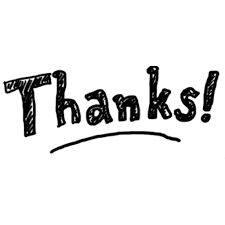

# My Social Media Accounts

![](2021-12-11-10-48-46.png)

Linkedin: https://www.linkedin.com/in/kahveciburak/

Twitter: https://twitter.com/burakkahveci_

Mail: burakkahveci42@gmail.com
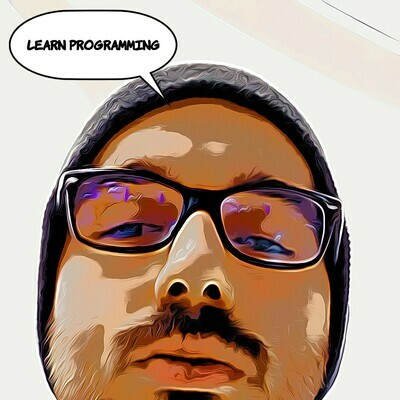